In [86]:
#importing packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [80]:
#loading the data set
df=pd.read_csv("GermanCredit.csv")

In [6]:
#viewing the data set
df.head
df.dtypes

CHK_ACCT            int64
DURATION            int64
HISTORY             int64
NEW_CAR             int64
USED_CAR            int64
FURNITURE           int64
RADIO/TV            int64
EDUCATION           int64
RETRAINING          int64
AMOUNT              int64
SAV_ACCT            int64
EMPLOYMENT          int64
INSTALL_RATE        int64
MALE_DIV            int64
MALE_SINGLE         int64
MALE_MAR_or_WID     int64
CO-APPLICANT        int64
GUARANTOR           int64
PRESENT_RESIDENT    int64
REAL_ESTATE         int64
PROP_UNKN_NONE      int64
AGE                 int64
OTHER_INSTALL       int64
RENT                int64
OWN_RES             int64
NUM_CREDITS         int64
JOB                 int64
NUM_DEPENDENTS      int64
TELEPHONE           int64
FOREIGN             int64
RESPONSE            int64
dtype: object

In [7]:
#converting the following features to 'category' type
df["C_ACCOUNT"]=df["CHK_ACCT"].astype("category")
df['JOB_TYPE']=df['JOB'].astype('category')
df['RESIDENT']=df['PRESENT_RESIDENT'].astype('category')
df['EMPLOY']=df['EMPLOYMENT'].astype('category')
df['S_ACCOUNT']=df['SAV_ACCT'].astype('category')
df['CRED_HIST']=df['HISTORY'].astype('category')

In [12]:
#dropping the old features
df.drop(['CHK_ACCT','HISTORY','SAV_ACCT','PRESENT_RESIDENT','JOB','EMPLOYMENT'],axis=1,inplace=True)

KeyError: "['CHK_ACCT' 'HISTORY' 'SAV_ACCT' 'PRESENT_RESIDENT' 'JOB' 'EMPLOYMENT'] not found in axis"

In [17]:
#viewing the transformed data set
#df.dtypes
df.columns
#df.shape

Index(['DURATION', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION',
       'RETRAINING', 'AMOUNT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'REAL_ESTATE',
       'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES',
       'NUM_CREDITS', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'RESPONSE',
       'C_ACCOUNT', 'JOB_TYPE', 'RESIDENT', 'EMPLOY', 'S_ACCOUNT',
       'CRED_HIST'],
      dtype='object')

In [18]:
#creating dummy variables for the categorical features
dummies=pd.get_dummies(df,columns=['C_ACCOUNT','JOB_TYPE','RESIDENT','EMPLOY','S_ACCOUNT','CRED_HIST'],drop_first=True)

In [19]:
#viewing the shape and columns of the data set 
dummies.shape
dummies.columns

Index(['DURATION', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION',
       'RETRAINING', 'AMOUNT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'REAL_ESTATE',
       'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES',
       'NUM_CREDITS', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'RESPONSE',
       'C_ACCOUNT_1', 'C_ACCOUNT_2', 'C_ACCOUNT_3', 'JOB_TYPE_1', 'JOB_TYPE_2',
       'JOB_TYPE_3', 'RESIDENT_2', 'RESIDENT_3', 'RESIDENT_4', 'EMPLOY_1',
       'EMPLOY_2', 'EMPLOY_3', 'EMPLOY_4', 'S_ACCOUNT_1', 'S_ACCOUNT_2',
       'S_ACCOUNT_3', 'S_ACCOUNT_4', 'CRED_HIST_1', 'CRED_HIST_2',
       'CRED_HIST_3', 'CRED_HIST_4'],
      dtype='object')

In [20]:
#creating the target variable
target=dummies[['RESPONSE']]

In [21]:
#dropping the target variable from the data set
dummies.drop('RESPONSE',axis=1,inplace=True)

In [22]:
#creating the data as numpy array
data=np.array(dummies)
data.shape

(1000, 45)

In [23]:
#transforming the target into numpy array
target=np.array(target)
target.shape

(1000, 1)

In [24]:
#Using X as data and y as target
X=data
y=target

In [27]:
#viewing the shape of the data and target
X.shape
y.shape

(1000, 1)

In [28]:
#importing scikit learn packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plt

In [ ]:
# first using train-test split (70:30)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(y_test.shape)

## 1. Logistic Regression

In [87]:
print("Logistic Regression")
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_logreg))

Logistic Regression
0.7333333333333333


### 1.1 10-fold cross validation 

In [88]:
accuracy = cross_val_score(logreg, X, y, cv = 10, scoring='accuracy').mean()
print('Accuracy {}'.format(accuracy))

Accuracy 0.7529999999999999


## 2. K - Nearest Neighbours

In [89]:
print("knn")
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_knn))

knn
0.63


## Random Forests

In [90]:
print("Random Forest")
#Random Forest
rfc=RandomForestClassifier(n_estimators=50,criterion='entropy')
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_rfc))
print(rfc.feature_importances_)

rfc1=RandomForestClassifier(n_estimators=70,criterion='gini')
rfc1.fit(X_train,y_train)
y_pred_rfc1=rfc1.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_rfc1))
print(rfc1.feature_importances_)

Random Forest
0.7233333333333334
[0.09763551 0.01891877 0.01373169 0.01520661 0.01566303 0.01227202
 0.01169562 0.12684328 0.04119499 0.00720757 0.02326264 0.00769151
 0.00702221 0.00828221 0.01808636 0.01231086 0.09496316 0.02056268
 0.01398776 0.01874629 0.02068691 0.00978923 0.02001052 0.00400011
 0.01587726 0.01297366 0.07397186 0.01236175 0.01916047 0.01400105
 0.0154128  0.01360492 0.01377139 0.0172505  0.016829   0.0121185
 0.01685408 0.01062917 0.01054694 0.00824774 0.02017753 0.01247795
 0.0148624  0.00787422 0.02122529]
0.7166666666666667
[0.09696893 0.02148212 0.01266162 0.01442247 0.0166118  0.01307825
 0.0083389  0.12299011 0.04067053 0.00670994 0.02043205 0.00799209
 0.00767876 0.00723361 0.01905109 0.01199244 0.09458625 0.02175556
 0.01226656 0.021025   0.01737112 0.01347418 0.0187229  0.00427364
 0.02336695 0.01207674 0.07155955 0.01075359 0.017342   0.0121361
 0.01617239 0.01321519 0.01925292 0.02174297 0.01748584 0.01376497
 0.01451072 0.01153444 0.00824702 0.00482218

## Ada Boosting

In [91]:
print("Ada Boosting")
#AdaBoosting
abc=AdaBoostClassifier(n_estimators=75)
abc.fit(X_train,y_train)
y_pred_abc=abc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_abc))

Ada Boosting
0.7133333333333334


## Decision Trees

In [47]:
print("Decision Tree")
#Decision Tree
dt=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

dt=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=16, min_samples_split=4, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=2, max_leaf_nodes=None)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

dt=DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=16, min_samples_split=4, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=2, max_leaf_nodes=None)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

dt=DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

dt=DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

dt=DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=20, min_samples_split=4, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

dt=DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=12, min_samples_split=4, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

dt=DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=12, min_samples_split=4, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=30)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

Decision Tree
0.67
0.6666666666666666
0.6833333333333333
0.6766666666666666
0.6833333333333333
0.6766666666666666
0.65
0.6966666666666667


In [48]:
#Confusion Matrix and other metrics (Accuracy,Error Rate,Precision,Sensitivity (Recall),Specificity,False Positive Rate)
print(metrics.confusion_matrix(y_test,y_pred))

[[ 35  56]
 [ 35 174]]


In [49]:
confusion=metrics.confusion_matrix(y_test,y_pred)

In [50]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [51]:
TP,TN,FP,FN

(174, 35, 56, 35)

In [52]:
#Accuracy
print("Accuracy is {0}".format((TP+TN)/float(TP+TN+FP+FN)))
#print(metrics.accuracy_score(y_test,y_pred))
#0.7

#Error Rate
print("Error Rate is {0}".format((FP+FN)/float(TP+TN+FP+FN)))
#print(1-metrics.accuracy_score(y_test,y_pred))
#0.3

#Recall
print("Recall is {0}".format(TP/float(TP+FN)))
#print(metrics.recall_score(y_test,y_pred))
#0.756880733945

#Precision
print("Precision is {0}".format(TP/float(TP+FP)))
#print(metrics.precision_score(y_test,y_pred))
#0.816831683168

#Specificity
print("Speicificity is {0}".format(TN/float(TN+FP)))
#0.548780487805

#False Positive Rate
print("False Positive Rate is {0}".format(FP/float(TN+FP)))
#0.451219512195

Accuracy is 0.6966666666666667
Error Rate is 0.30333333333333334
Recall is 0.8325358851674641
Precision is 0.7565217391304347
Speicificity is 0.38461538461538464
False Positive Rate is 0.6153846153846154


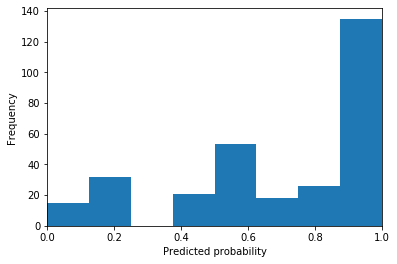

In [60]:
#Predicted probability of test set
y_pred_prob=dt.predict_proba(X_test)[:,1]

#Plotting histogram of the predicted probabilities
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

## Performance Measurement of our model
#### AUC ROC Curve

In [64]:
#threshold=0.3 for predicted probabilities
y_pred1=binarize([y_pred_prob],0.3)[0]

print(metrics.confusion_matrix(y_test,y_pred1))

print("Accuracy when Threshold=0.3 is {0}".format(metrics.accuracy_score(y_test,y_pred1)))

#Precision at threshold=0.3
print("Precision when Threshold=0.3 is {0}".format(metrics.precision_score(y_test,y_pred1)))

#Recall at threshold=0.3
print("Recall when Threshold=0.3 is {0}".format(metrics.recall_score(y_test,y_pred1)))


[[ 25  66]
 [ 22 187]]
Accuracy when Threshold=0.3 is 0.7066666666666667
Precision when Threshold=0.3 is 0.7391304347826086
Recall when Threshold=0.3 is 0.8947368421052632


In [66]:
#threshold=0.4 for predicted probabilities
y_pred2=binarize([y_pred_prob],0.4)[0]

print(metrics.confusion_matrix(y_test,y_pred2))


print("Accuracy when Threshold=0.4 is {0}".format(metrics.accuracy_score(y_test,y_pred2)))
#0.716666666667

#Precision at threshold=0.3
print("Precision when Threshold=0.4 is {0}".format(metrics.precision_score(y_test,y_pred2)))
#0.754789272031

#Recall at threshold=0.3
print("Recall when Threshold=0.4 is {0}".format(metrics.recall_score(y_test,y_pred2)))
#0.903669724771

[[ 25  66]
 [ 23 186]]
Accuracy when Threshold=0.4 is 0.7033333333333334
Precision when Threshold=0.4 is 0.7380952380952381
Recall when Threshold=0.4 is 0.8899521531100478


# ROC Curve and AUC

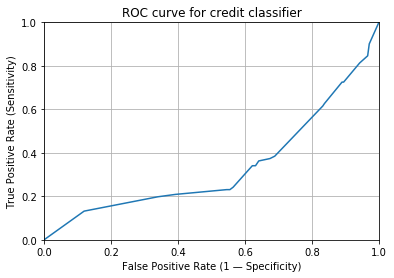

In [81]:
#True Positive Rate, False Positive Rate and Thresholds
tpr,fpr,thresholds=metrics.roc_curve(y_test,y_pred_prob)

#Plotting the ROC curve
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('ROC curve for credit classifier')
plt.xlabel('False Positive Rate (1 — Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

#tpr,fpr

In [73]:
#Defining a function to find Sensitivity and Specificity at different thresholds
def evaluate_threshold(threshold):
    print('Sensitivity:',tpr[thresholds>threshold][-1])
    print('Specificity:',1-(fpr[thresholds>threshold])[-1])

In [74]:
evaluate_threshold(0.3)

Sensitivity: 0.7252747252747253
Specificity: 0.10526315789473684


In [78]:
evaluate_threshold(0.4)

Sensitivity: 0.7252747252747253
Specificity: 0.11004784688995217


In [79]:
evaluate_threshold(0.5)

Sensitivity: 0.6153846153846154
Specificity: 0.16746411483253587


## AUC Curve

In [82]:
#Printing the ROC AUC score
print(metrics.roc_auc_score(y_test,y_pred_prob))

0.6639939008360062
